In [1]:
%matplotlib notebook
import numpy as np
import orbipy as op
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
halo = pd.read_csv('halo family SE L1.txt', sep=' ', header=None)
halo.columns = ['x', 'z', 'vy']
halo['z'] = -1*halo['z']

In [3]:
halo.head()

,x,z,vy
0,0.991612,-0.000068,-0.009585
1,0.991615,-0.000177,-0.009596
2,0.991618,-0.000240,-0.009606
3,0.991621,-0.000290,-0.009616
4,0.991624,-0.000333,-0.009626


In [4]:
model = op.crtbp3_model()
precise_model = op.crtbp3_model()
precise_model.integrator.set_params(max_step=np.pi/180)
stm_model = op.crtbp3_model(stm=True)
plotter = op.plotter.from_model(model, length_units='nd', velocity_units='nd/nd')
scaler = plotter.scaler

In [5]:
center = (model.L1+model.mu1)*0.5

In [6]:
halo = halo.loc[~halo.apply(np.round, args=[9]).duplicated()]

In [15]:
import pickle

In [16]:
with open('amp.pkl', 'rb') as fp:
    applicability = pickle.load(fp)

<IPython.core.display.Javascript object>


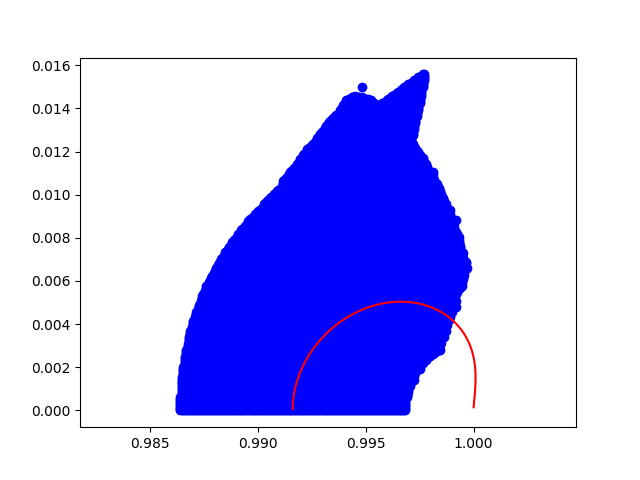

(0.9857269913511217,
 1.0007788050779065,
 -0.0007787433155080214,
 0.01635360962566845)

In [21]:
plt.plot(applicability['x0'], applicability['z0'], 'ob')
plt.plot(halo['x'], -1*halo['z'], 'r')
plt.axis('equal')

In [22]:
halo.shape[0]

4770

In [36]:
init_cond = spl(0.548484)

In [37]:
s0 = model.get_zero_state()

s0[0] = init_cond[0]
s0[2] = init_cond[1]
s0[4] = init_cond[2]

<IPython.core.display.Javascript object>


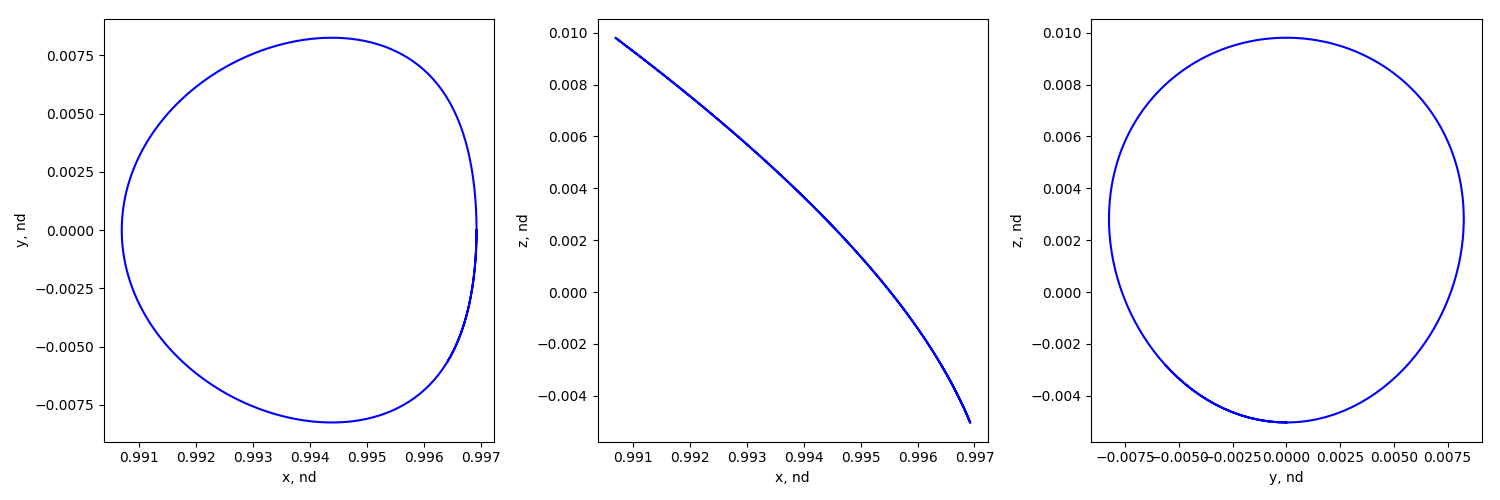

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f21db365898>,
      dtype=object)

In [38]:
df = precise_model.prop(s0,0,np.pi)
plotter.plot_proj(df)

до плоскоти xz 2 раза

In [41]:
dc = op.differential_correction.from_preset(stm_model, 'halo')

In [42]:
s1 = dc.shoot(s0, 90)

In [46]:
s0

array([ 0.99692362,  0.        , -0.00502959,  0.        , -0.0252994 ,
        0.        ])

In [45]:
s1

array([ 0.99692362,  0.        , -0.00502959,  0.        , -0.0252994 ,
        0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  1.        ])

In [47]:
print(*s0)

0.9969236158092735 0.0 -0.005029591485748435 0.0 -0.0252993975038934 0.0


In [49]:
print(*s1[:6])

0.9969236158092735 0.0 -0.005029591486201194 0.0 -0.0252993975034587 0.0


In [51]:
dc.it

1

In [54]:
plane = op.eventY(count=2)

In [55]:
det = op.event_detector(precise_model, [plane])

In [63]:
df0, _ = det.prop(s0, 0.0, 10, last_state='last')

In [64]:
df1, _ = det.prop(s1[:6], 0.0, 10, last_state='last')

In [65]:
np.linalg.norm(df0.iloc[0].values[1:] - df0.iloc[-1].values[1:])

2.1203589326771794e-10

In [66]:
np.linalg.norm(df1.iloc[0].values[1:] - df1.iloc[-1].values[1:])

4.775377797092548e-13

<IPython.core.display.Javascript object>


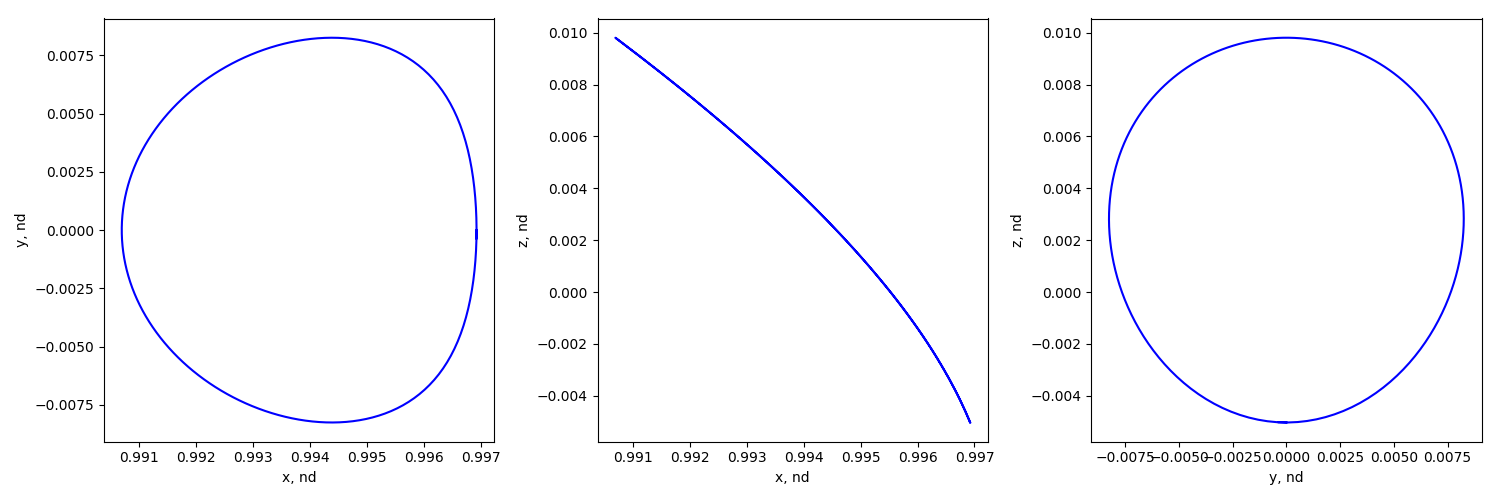

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f21f155e320>,
      dtype=object)

In [62]:
plotter.plot_proj(df1)

<IPython.core.display.Javascript object>


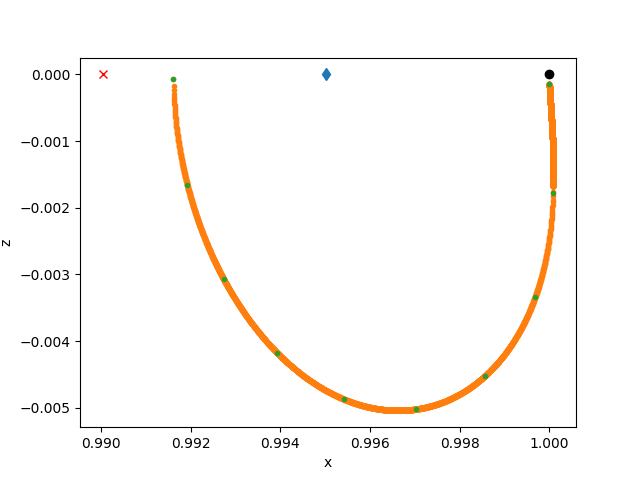

Text(0, 0.5, 'z')

In [13]:
plt.plot(model.mu1, 0, 'ok')
plt.plot(model.L1, 0, 'rx')
plt.plot(center,0, 'd')
plt.plot(halo['x'], halo['z'],'.')
plt.plot(*spl.get_points(10)[:,:2].T, '.')
plt.xlabel('x')
plt.ylabel('z')

In [9]:
spl = op.lines.spline.cubic(halo.to_numpy(), usecols=[0, 1])

In [12]:
spl.get_points(10)

array([[ 9.91612276e-01, -6.81350426e-05, -9.58538708e-03],
       [ 9.91923117e-01, -1.66499288e-03, -1.06384882e-02],
       [ 9.92735779e-01, -3.07626521e-03, -1.32268992e-02],
       [ 9.93933210e-01, -4.18074048e-03, -1.67535842e-02],
       [ 9.95408557e-01, -4.86934840e-03, -2.08961742e-02],
       [ 9.97027308e-01, -5.02080223e-03, -2.56216128e-02],
       [ 9.98568547e-01, -4.51778839e-03, -3.13056544e-02],
       [ 9.99680931e-01, -3.34567958e-03, -3.94087937e-02],
       [ 1.00008802e+00, -1.77604738e-03, -5.59471191e-02],
       [ 1.00000380e+00, -1.44542678e-04, -2.02860878e-01]])